12/22/2021

Conos

GOAL
Alex's advice on my sample comparison problem is to integrate each cluster separately,
and then show that the cluster 6 integration has a lower entropy than others:
 https://www.nature.com/articles/s41592-019-0466-z
 (see methods)

METHODS
Installed in conda env conos

In [2]:
library(conos)
library(SeuratObject)
library(Signac)
library(Seurat)
suppressMessages(library(ggplot2))
suppressMessages(library(svglite))
#suppressMessages(library(repr))
#suppressMessages(library(tidyverse))
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/ochapman/miniconda3/envs/conos/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] svglite_2.0.0      ggplot2_3.3.5      Seurat_4.0.6       Signac_1.5.0      
[5] SeuratObject_4.0.4 conos_1.4.4        igraph_1.2.10      Matrix_1.4-0      

loaded via a namespace (and not attached):
  [1] uuid_1.0-3             circlize_0.4.13        fastmatch_1.1-3       
  [4] systemfonts_1.0.3      plyr_1.8.6             repr_1.1.3            
  [7] l

In [2]:
ht_rds <- '../2021-08-29_seurat/rcmb56-ht_seuratobjdfclean.rds'
pdx_rds <- '../2021-08-29_seurat/rcmb56-pdx_xenocelldfcleanseuratobj.rds'
ht <- readRDS(ht_rds)
pdx <- readRDS(pdx_rds)

In [3]:
# Assign our best guess at cell ids
new.cluster.ids <- c("ecDNA- tumor", "ecDNA- tumor", "ecDNA- tumor", "ecDNA- MT high tumor", "ecDNA- tumor", "ecDNA- tumor",
    "ecDNA+ tumor", "hematopoietic lineage", "oligodendrocyte", "neuron", "astrocyte", "OPC")
names(new.cluster.ids) <- levels(ht)
ht <- RenameIdents(ht, new.cluster.ids)

# Recluster all pdx cells to just 'pdx'
new.cluster.ids <- rep("pdx",times=17)
names(new.cluster.ids) <- levels(pdx)
pdx <- RenameIdents(pdx, new.cluster.ids)

# Prefix cell barcodes
ht <- RenameCells(ht,add.cell.id='ht')
pdx <- RenameCells(pdx,add.cell.id='pdx')

In [4]:
DefaultAssay(ht) <- 'SCT'
DefaultAssay(pdx) <- 'SCT'

In [5]:
con <- Conos$new(list(ht=ht,pdx=pdx))

# Build joint graph
con$buildGraph(k=30, k.self=5, space='PCA', ncomps=30, n.odgenes=2000, matching.method='mNN', metric='angular', score.component.variance=TRUE, verbose=TRUE)

found 0 out of 1 cached PCA space pairs ... 

running 1 additional PCA space pairs 

Centering and scaling data matrix

Centering and scaling data matrix



.

 done

inter-sample links using mNN 

Centering and scaling data matrix

Centering and scaling data matrix



.

 done

local pairs 

 done


building graph .



.

done



In [6]:
# Find communities
con$findCommunities(test.stability=FALSE)

In [7]:
# Generate embedding
con$embedGraph(method='largeVis',seed=47)

Estimating embeddings.




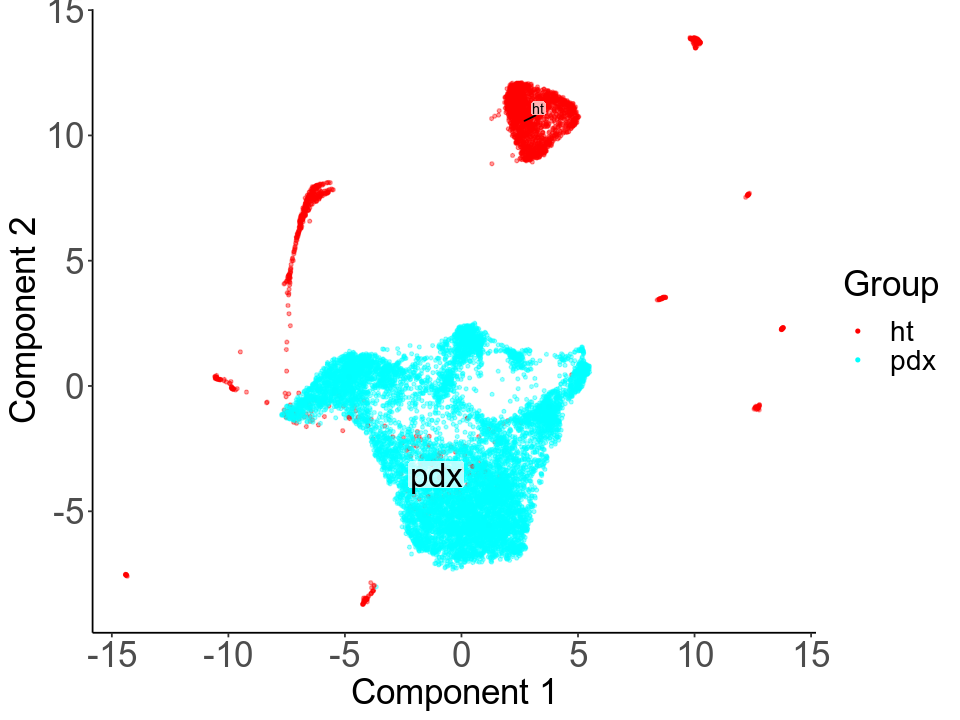

In [77]:
plot <- con$plotGraph(color.by='sample')
filename = "joint_embedding_sample.svg"

options(repr.plot.width = 8, repr.plot.height = 6)
theme_settings = element_text(hjust = 0.5, family="Arial", size=21)
plot <- plot & theme_classic() + theme(text = theme_settings, axis.text=theme_settings)
plot
ggsave(file=filename,plot=plot,width=8,height=6)

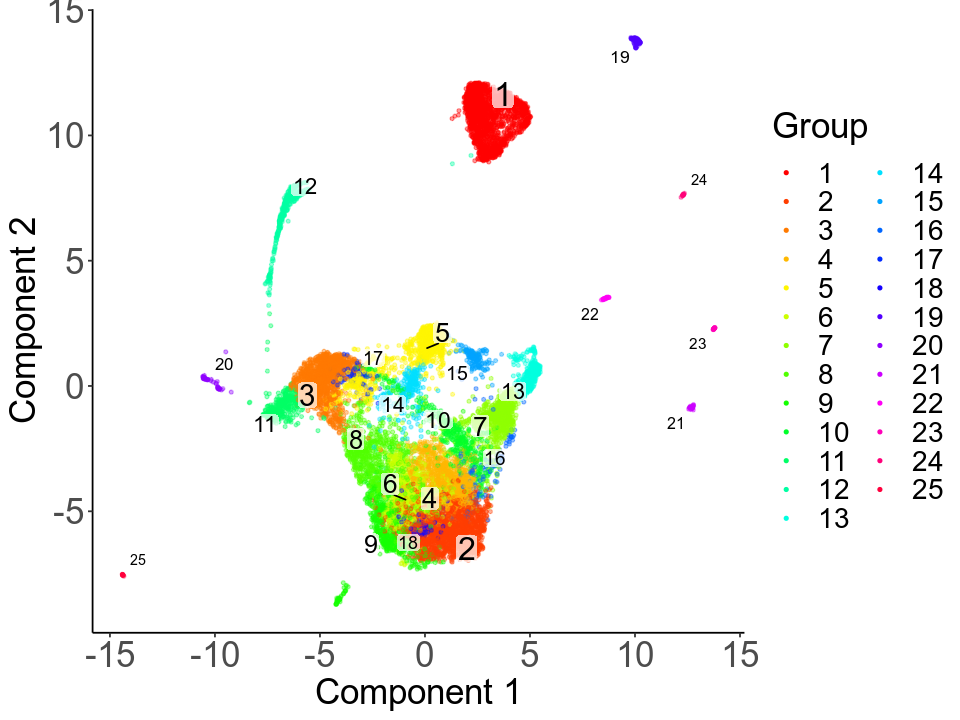

In [78]:
# Plot joint graph
plot <- con$plotGraph()
filename <- "joint_embedding_cluster.svg"

options(repr.plot.width = 8, repr.plot.height = 6)
theme_settings = element_text(hjust = 0.5, family="Arial", size=21)
plot <- plot & theme_classic() + theme(text = theme_settings, axis.text=theme_settings)
plot
ggsave(file=filename,plot=plot,width=8,height=6)

Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


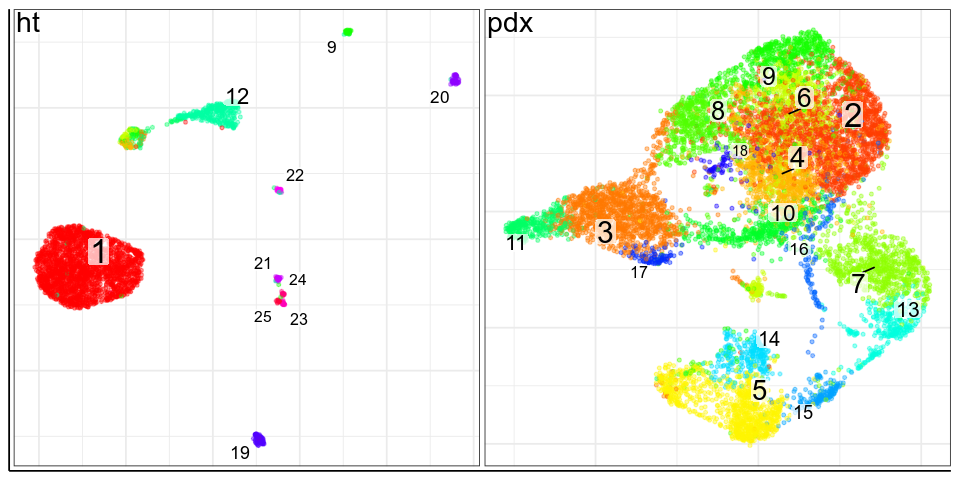

In [84]:
# Plot panel with joint clustering results
plot <- con$plotPanel(embedding='wnn.umap')
filename = "og_embedding_new_clusters.svg"

options(repr.plot.width = 8, repr.plot.height = 4)
theme_settings = element_text(hjust = 0.5, family="Arial", size=21)
plot <- plot & theme_classic() + theme(text = theme_settings, axis.text=theme_settings)
plot
ggsave(file=filename,plot=plot,width=8,height=6)

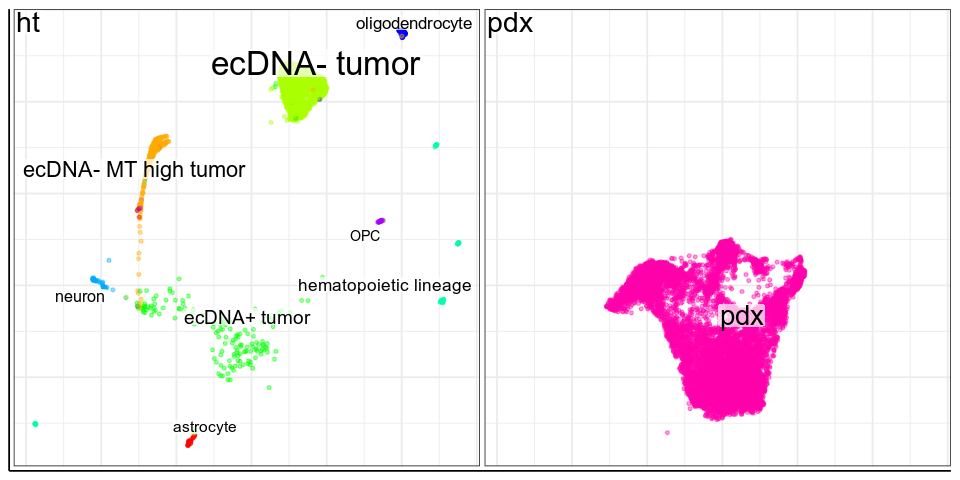

In [83]:
plot <- con$plotPanel(use.common.embedding=TRUE,use.local.clusters=TRUE)
filename = "new_embedding_og_clusters.svg"

options(repr.plot.width = 8, repr.plot.height = 4)
theme_settings = element_text(hjust = 0.5, family="Arial", size=21)
plot <- plot & theme_classic() + theme(text = theme_settings, axis.text=theme_settings)
plot
ggsave(file=filename,plot=plot,width=8,height=4)

In [90]:
?plot

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

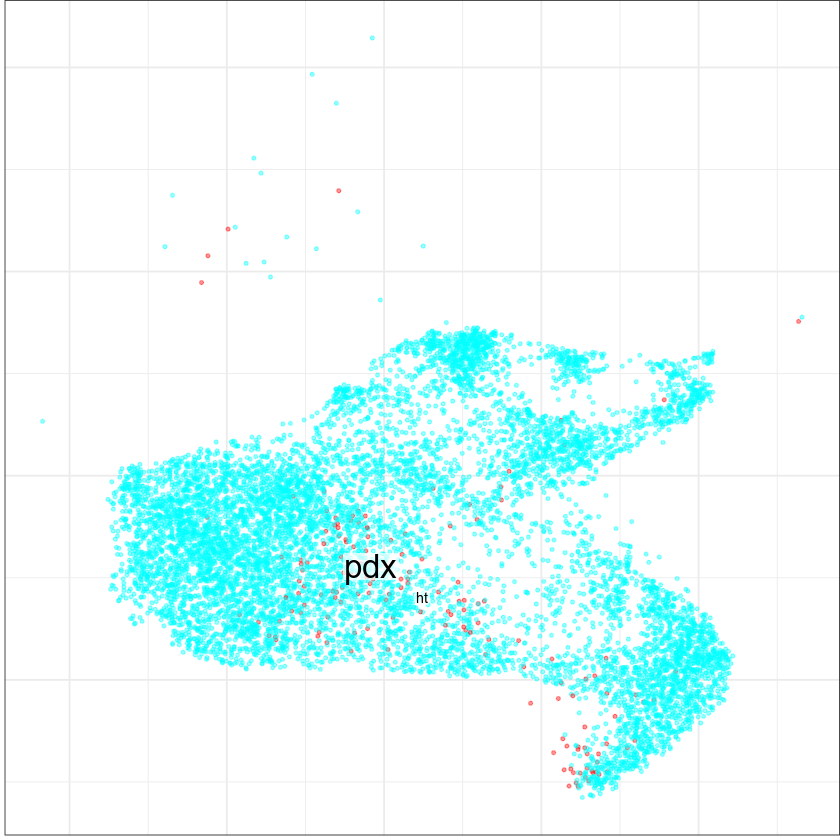

In [15]:
# Plot only ht cluster 6
pdx_subset <- rownames(pdx[[]])
ht_subset <- rownames(subset(ht,subset = seurat_clusters == '6')[[]])
cells_subset <- c(pdx_subset, ht_subset)
con$plotGraph(color.by = 'sample', subset = cells_subset)

In [ ]:
names(con$clusters)

In [ ]:
ht[[]]